In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv(r"C:\Users\ROY MATHEW\Downloads\ev\EV_Dataset.csv")


In [10]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
None
     Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICL

In [12]:
category_sales = df.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().sort_values(ascending=False)
type_sales = df.groupby("Vehicle_Type")["EV_Sales_Quantity"].sum().sort_values(ascending=False)

C:\Users\ROY MATHEW\AppData\Local\Temp\ipykernel_8336\2196469312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
C:\Users\ROY MATHEW\AppData\Local\Temp\ipykernel_8336\2196469312.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_sales.values, y=type_sales.index, palette="magma")


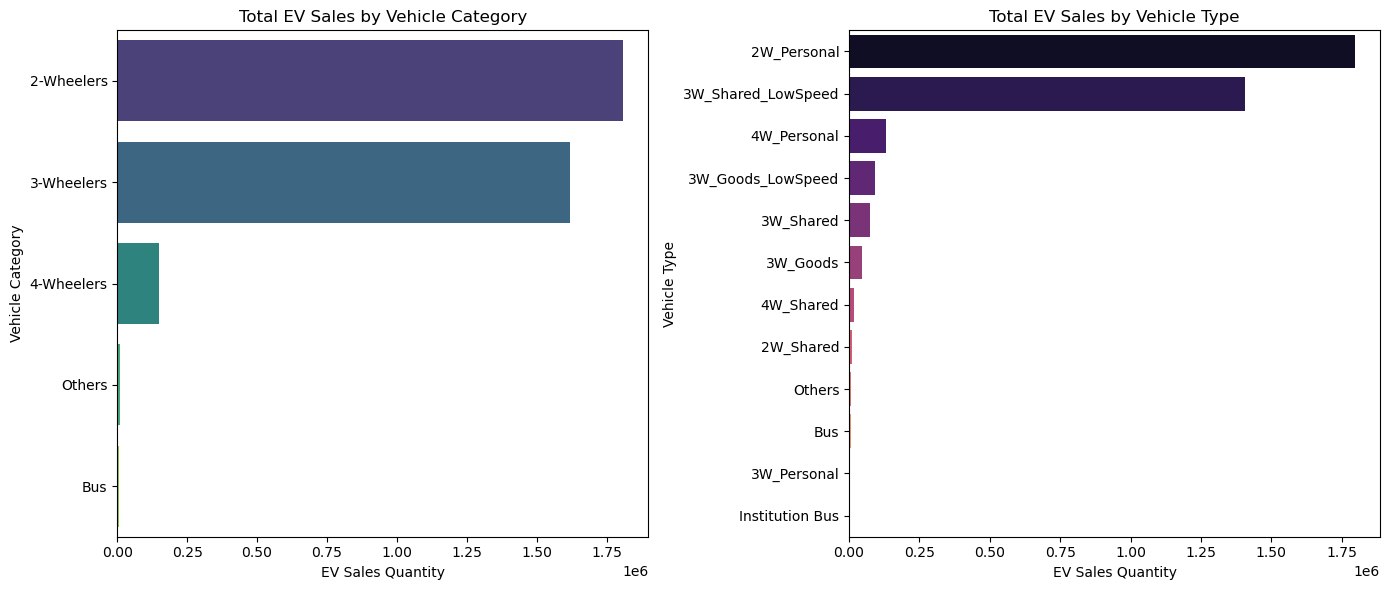

In [14]:
# Step 2: Visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Total EV Sales by Vehicle Category")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Vehicle Category")

plt.subplot(1, 2, 2)
sns.barplot(x=type_sales.values, y=type_sales.index, palette="magma")
plt.title("Total EV Sales by Vehicle Type")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Vehicle Type")

plt.tight_layout()
plt.show()

<Axes: xlabel='Year'>

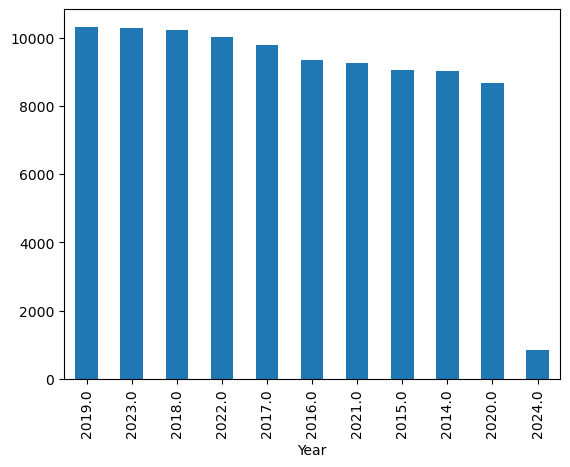

In [16]:
df['Year'].value_counts().plot(kind = 'bar')

<Axes: xlabel='State'>

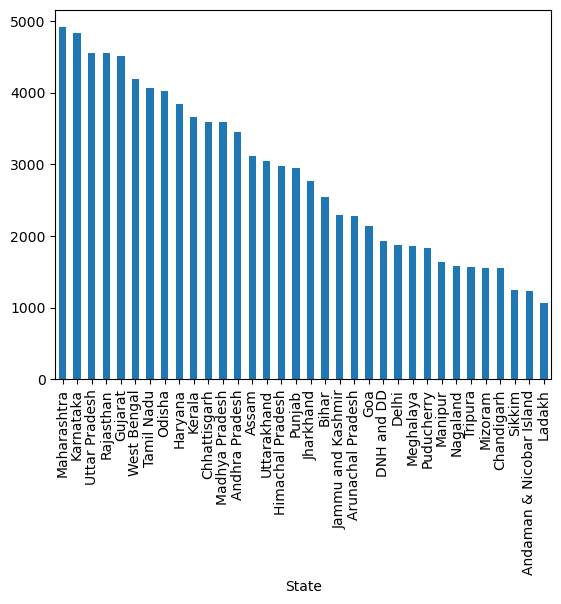

In [18]:


df['State'].value_counts().plot(kind = 'bar')



<Axes: ylabel='count'>

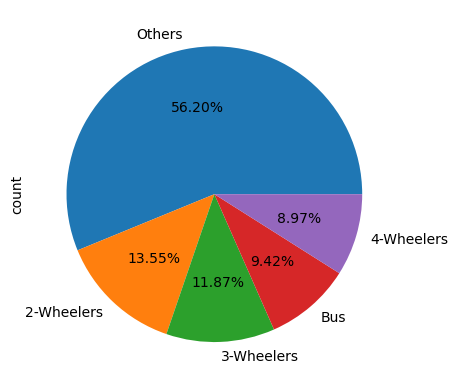

In [20]:
df['Vehicle_Category'].value_counts().plot(kind = 'pie', autopct ='%.2f%%')

<Axes: ylabel='count'>

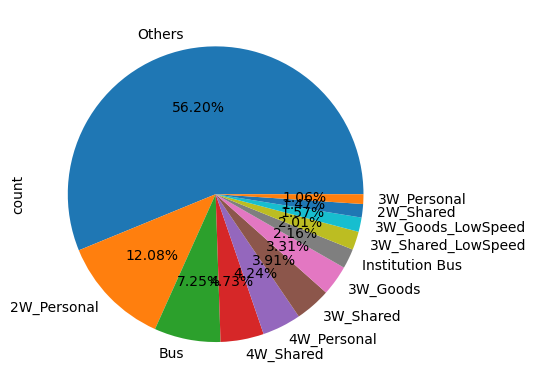

In [22]:
df['Vehicle_Type'].value_counts().plot(kind = 'pie', autopct ='%.2f%%')

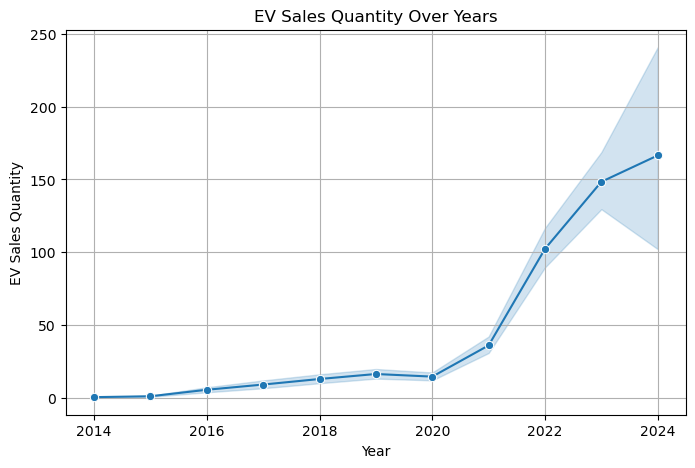

In [24]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('EV Sales Quantity Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.show()

C:\Users\ROY MATHEW\AppData\Local\Temp\ipykernel_8336\125086098.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='State', y='EV_Sales_Quantity', estimator=sum, ci=None)


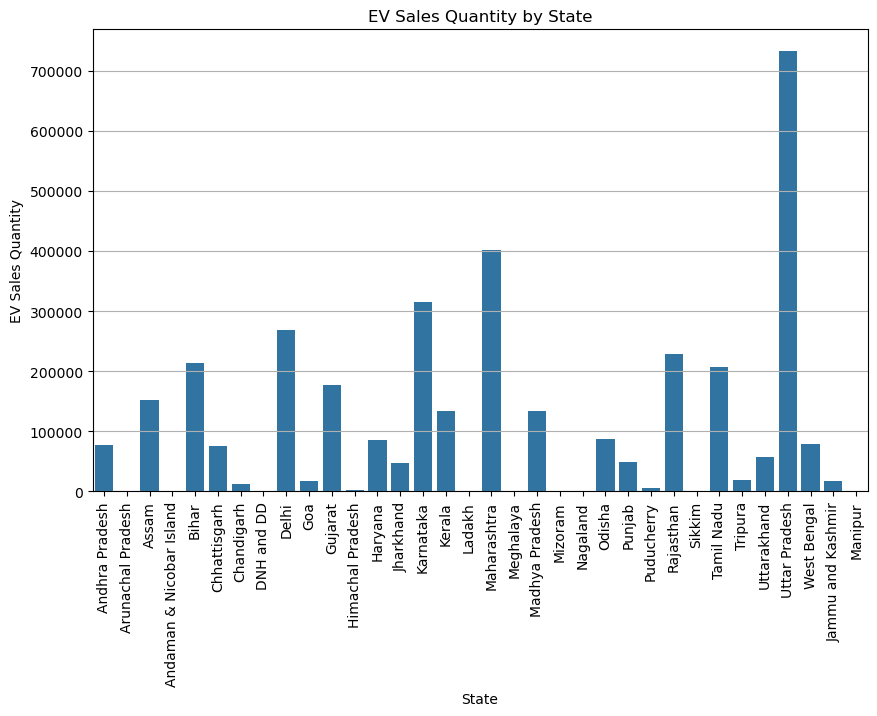

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='State', y='EV_Sales_Quantity', estimator=sum, ci=None)
plt.title('EV Sales Quantity by State')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

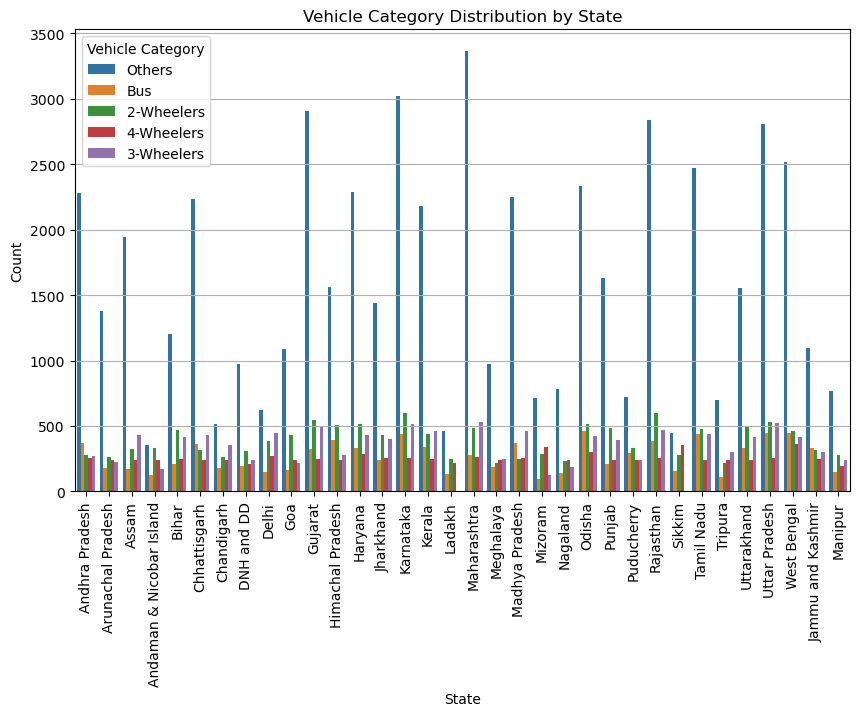

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', hue='Vehicle_Category')
plt.title('Vehicle Category Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Vehicle Category')
plt.grid(axis='y')
plt.show()

In [30]:

pivot = df.pivot_table(index="State", columns="Vehicle_Type", values="EV_Sales_Quantity", aggfunc="sum", fill_value=0)

# Normalize
scaler = StandardScaler()
scaled = scaler.fit_transform(pivot)


In [32]:
# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pivot['Cluster'] = kmeans.fit_predict(scaled)

# Show sample states in each cluster
print("\nCustomer Segmentation by State:")
for i in range(4):
    print(f"\nCluster {i} States:\n", pivot[pivot['Cluster'] == i].index.tolist())


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Customer Segmentation by State:

Cluster 0 States:
 ['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'DNH and DD', 'Goa', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Ladakh', 'Madhya Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tripura', 'Uttarakhand', 'West Bengal']

Cluster 1 States:
 ['Delhi', 'Karnataka', 'Maharashtra']

Cluster 2 States:
 ['Chhattisgarh', 'Gujarat', 'Kerala', 'Tamil Nadu']

Cluster 3 States:
 ['Uttar Pradesh']


In [36]:

print("\nRecommendations:")
print("- 2-Wheelers (e.g., 2W_Personal) are the most sold and suited for individual daily commutes.")
print("- 3-Wheelers (Passenger & Goods) are popular in shared transport and small business logistics.")
print("- 4-Wheelers (Personal & Shared) are gaining traction for family and ride-sharing use.")
print("- Bus and Institution Bus types are low in volume but important for mass transport solutions.")


Recommendations:
- 2-Wheelers (e.g., 2W_Personal) are the most sold and suited for individual daily commutes.
- 3-Wheelers (Passenger & Goods) are popular in shared transport and small business logistics.
- 4-Wheelers (Personal & Shared) are gaining traction for family and ride-sharing use.
- Bus and Institution Bus types are low in volume but important for mass transport solutions.
